In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 9s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1)
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

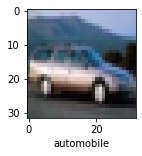

In [11]:
plot_sample(X_train, y_train, 4)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.4670 - accuracy: 0.4762
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1202 - accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9895 - accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9080 - accuracy: 0.6835
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8492 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7982 - accuracy: 0.7231
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7506 - accuracy: 0.7404
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7129 - accuracy: 0.7533
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6732 - accuracy: 0.7666
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [16]:
y_pred = cnn.predict(X_test)

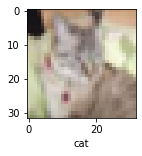

In [22]:
plot_sample(X_test, y_test,8)

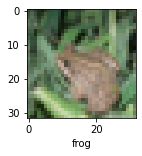

In [23]:
plot_sample(X_test, y_test,4)

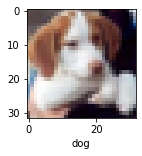

In [26]:
plot_sample(X_test, y_test,16)